In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
k=pd.read_excel("E://data//EastWestAirlines.xlsx")

In [8]:
k.head(20)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [3]:
airline=k.drop('ID#',axis=1)

In [4]:
airline.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
5,16420,0,1,1,1,0,0,0,0,6942,0
6,84914,0,3,1,1,27482,25,0,0,6994,0
7,20856,0,1,1,1,5250,4,250,1,6938,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1


In [5]:
#normalising data
def normfunc(i):
    x=((i-i.min()/i.max()-i.min()))
    return x

In [6]:
normdata=normfunc(airline)

In [7]:
normdata.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.000000,3999.000000
mean,7.360133e+04,144.114529,0.859515,-0.318830,-0.187747,17144.846212,11.60190,460.055764,1.373593,4116.559149,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.134540,0.482957
min,0.000000e+00,0.000000,-0.200000,-0.333333,-0.200000,0.000000,0.00000,0.000000,0.000000,-0.000241,0.000000
25%,1.852750e+04,0.000000,-0.200000,-0.333333,-0.200000,1250.000000,3.00000,0.000000,0.000000,2327.999759,0.000000
50%,4.309700e+04,0.000000,-0.200000,-0.333333,-0.200000,7171.000000,12.00000,0.000000,0.000000,4093.999759,0.000000
75%,9.240400e+04,0.000000,1.800000,-0.333333,-0.200000,23800.500000,17.00000,311.000000,1.000000,5788.499759,1.000000
max,1.704838e+06,11148.000000,3.800000,1.666667,3.800000,263685.000000,86.00000,30817.000000,53.000000,8293.999759,1.000000


In [27]:
#clustering
t=[]
k=list(range(2,13))
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(normdata)
    t.append(kmeans.inertia_)
    
t

[20823632642041.965,
 11790094245028.44,
 7549589488499.362,
 5724556335991.397,
 4541474708730.526,
 3697702020479.9526,
 3272039060797.7666,
 2898110809020.4136,
 2628745996918.227,
 2380318115911.95,
 2144402635806.1138]

Text(0, 0.5, 'total_within_SS')

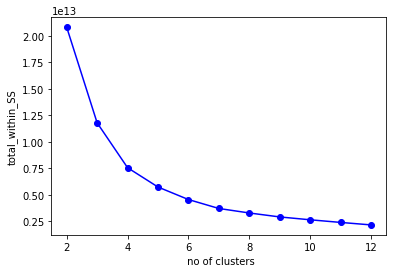

In [28]:
#plotting elbow curve
plt.plot(k,t,'bo-')
plt.xlabel(" no of clusters")
plt.ylabel("total_within_SS")

In [39]:
model=KMeans(n_clusters=4)
model.fit(normdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
final=pd.Series(model.labels_)
airline['clust']=final

In [42]:
airline


,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,28143,0,1,1,1,174,1,0,0,7000,0
1,0,19244,0,1,1,1,215,2,0,0,6968,0
2,0,41354,0,1,1,1,4123,4,0,0,7034,0
3,0,14776,0,1,1,1,500,1,0,0,6952,0
4,1,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0,18476,0,1,1,1,8525,4,200,1,1403,1
3995,0,64385,0,1,1,1,981,5,0,0,1395,1
3996,0,73597,0,3,1,1,25447,8,0,0,1402,1
3997,0,54899,0,1,1,1,500,1,500,1,1401,0


In [43]:
airline=airline.iloc[:,[11,0,1,2,3,4,5,6,7,8,9,10]]

In [44]:
airline.iloc[:, 2:10].groupby(airline.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo
clust,,,,,,,,
0,30972.230413,101.698006,1.668091,1.016382,1.004986,10102.236467,9.327991,290.091168
1,128269.936735,219.413265,2.941837,1.009184,1.032653,31243.133673,16.504082,754.874490
2,323009.848649,337.248649,3.145946,1.016216,1.000000,43644.118919,18.583784,1283.335135
3,842320.230769,512.692308,3.346154,1.000000,1.115385,57797.192308,22.730769,1845.884615


In [ ]:
airline.to_csv("Kmeans_airplane.csv", encoding = "utf-8")

# checking my clusters


In [47]:
airline[airline['clust']==3]

,Award?,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
43,1,3,619393,0,3,1,1,15008,14,0,0,7819
87,0,3,609477,0,3,1,1,21422,22,1200,8,6820
117,1,3,969559,0,1,1,1,2500,3,1000,2,7718
126,1,3,602064,0,5,1,1,194753,26,2250,10,7652
151,1,3,930410,0,5,1,1,211284,18,2250,6,7640
186,1,3,707079,0,4,1,1,57173,40,3450,12,7523
220,1,3,1302051,2706,5,1,1,90653,32,3050,7,7467
275,1,3,1704838,0,1,1,1,17108,32,4823,23,7283
313,1,3,714717,0,5,1,1,119162,20,1750,4,7183
318,1,3,766419,0,1,1,1,11398,3,398,1,7162


In [49]:
airline[airline['clust']==2].head(30)

,Award?,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
8,1,2,443003,0,3,2,1,1753,43,3850,12,6948
32,0,2,276571,0,4,1,1,42044,23,0,0,7872
45,1,2,288865,967,1,1,1,23600,14,2000,4,6884
63,0,2,362642,0,1,1,1,28079,8,0,0,6835
68,1,2,230715,0,3,1,1,24047,12,0,0,6826
71,0,2,252386,0,4,1,1,39787,13,0,0,7787
72,0,2,550367,0,3,1,1,12500,13,50,1,7801
111,1,2,298911,0,1,1,1,8550,11,2550,8,7714
114,1,2,295638,0,1,1,1,5422,20,818,2,7700
135,1,2,259484,1776,1,1,1,19172,26,7172,23,6723
